# Imports:

In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from xml.etree import ElementTree
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols 

import matplotlib.pyplot as plt
%matplotlib inline

# import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Set local state
α = Alpha = alpha = 0.05
random_state=1992
np.random.seed(1992)

# Hides future deprecation warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Left Align Tables in Jupyter Notebook
from IPython.core.display import HTML
table_css = 'table {align:left;display:block}'
HTML('<style>{}</style>'.format(table_css))

<div class="alert alert-success">

# Acquire & Prepare:

In [3]:
# Read in csv from local file as leam_df (Life Expectancy And Mortality DataFrame)
leam_df = pd.read_csv('clean_leam.csv', index_col=0)

In [4]:
# Check DataFrame
leam_df.T

0          1          2          3         4     \
YEAR                  2000       2000       2000       2000      2000   
COUNTRY                AFG        AFG        AFG        AGO       AGO   
WHOSIS_000001     54.98949   55.41726   54.57449   49.30265  52.12018   
WHOSIS_000002     46.76397   46.58344   46.93113   42.87378  44.74432   
WHOSIS_000007     10.16798   10.11293   10.22541   10.73909  11.80188   
WHOSIS_000015     13.92182   14.20647   13.63259   14.41537  16.00562   
life_expectancy  31.460815  31.580025  31.340905  29.332722    31.168   
SEX_BTSX                 1          0          0          1         0   
SEX_FMLE                 0          1          0          0         1   
SEX_MLE                  0          0          1          0         0   

                      5          6          7         8          9     ...  \
YEAR                  2000       2000       2000      2000       2000  ...   
COUNTRY                AGO        ALB        ALB       ALB        ARE  ...   
WHOSIS_000001     46.77004   73.54528   76.91914  70.65347   73.18027  ...   
WHOSIS_000002     41.18177   65.23516   67.68733  63.14932   63.85107  ...   
WHOSIS_000007      9.66284   14.98377   16.71034  13.50208   13.58815  ...   
WHOSIS_000015     12.82086    18.9965    21.2058  17.10085   18.68954  ...   
life_expectancy  27.608877  43.190177  45.630652  41.10143  42.327258  ...   
SEX_BTSX                 0          1          0         0          1  ...   
SEX_FMLE                 0          0          1         0          0  ...   
SEX_MLE                  1          0          0         1          0  ...   

                     2198       2199       2200       2201       2202  \
YEAR                 2019       2019       2019       2019       2019   
COUNTRY               YEM        ZAF        ZAF        ZAF        ZMB   
WHOSIS_000001    64.41312   65.25417   68.28989   62.20109    62.4529   
WHOSIS_000002    56.90595   56.15329   57.69447   54.58585   54.40409   
WHOSIS_000007    12.77636    13.8575     14.772   12.69391   12.58347   
WHOSIS_000015    16.77037   19.12211   20.52139   17.34433   16.53152   
life_expectancy  37.71645  38.596767  40.319437  36.706295  36.492995   
SEX_BTSX                0          1          0          0          1   
SEX_FMLE                0          0          1          0          0   
SEX_MLE                 1          0          0          1          0   

                     2203       2204      2205      2206       2207  
YEAR                 2019       2019      2019      2019       2019  
COUNTRY               ZMB        ZMB       ZWE       ZWE        ZWE  
WHOSIS_000001    65.36993   59.53606  60.68252  63.60674   57.51101  
WHOSIS_000002    56.31194   52.49771  53.06544  54.80482   51.20607  
WHOSIS_000007     13.6557   11.27271  11.48429  12.43903   10.18165  
WHOSIS_000015    18.04779    14.6803  15.55015  16.98877   13.58761  
life_expectancy  38.34634  34.496695   35.1956  36.95984  33.121585  
SEX_BTSX                0          0         1         0          0  
SEX_FMLE                1          0         0         1          0  
SEX_MLE                 0          1         0         0          1  

[10 rows x 2208 columns]

<div class="alert alert-warning">

# Split

In [5]:
def split(df, stratify=False, target=None):
    """
    This Function splits the DataFrame into train, validate, and test
    then prints a graphic representation and a mini report showing the shape of the original DataFrame
    compared to the shape of the train, validate, and test DataFrames.
    
    IMPORTS Required:
    from sklearn.model_selection import train_test_split
    
    ARGUMENTS:
          df - Input the DataFrame you will split
    stratify - True will stratify for your Target (Do NOT stratify on continuous data)
               False will ignore this function
      target - Only needed if you will stratify
    """
    
    # Do NOT stratify on continuous data
    if stratify:
        # Split df into train and test using sklearn
        train, test = train_test_split(df, test_size=.2, random_state=1992, stratify=df[target])
        # Split train_df into train and validate using sklearn
        train, validate = train_test_split(train, test_size=.25, random_state=1992, stratify=df[target])
        
    else:
        train, test = train_test_split(df, test_size=.2, random_state=1992)
        train, validate = train_test_split(train, test_size=.37, random_state=1992)
    
    # reset index for train validate and test
    train.reset_index(drop=True, inplace=True)
    validate.reset_index(drop=True, inplace=True)
    test.reset_index(drop=True, inplace=True)

    train_prcnt = round((train.shape[0] / df.shape[0]), 2)*100
    validate_prcnt = round((validate.shape[0] / df.shape[0]), 2)*100
    test_prcnt = round((test.shape[0] / df.shape[0]), 2)*100
    
    print('________________________________________________________________')
    print('|                              DF                              |')
    print('|--------------------:--------------------:--------------------|')
    print('|        Train       |      Validate      |        Test        |')
    print(':--------------------------------------------------------------:')
    print()
    print()
    print(f'Prepared df: {df.shape}')
    print()
    print(f'      Train: {train.shape} - {train_prcnt}%')
    print(f'   Validate: {validate.shape} - {validate_prcnt}%')
    print(f'       Test: {test.shape} - {test_prcnt}%')
 
    
    return train, validate, test

In [6]:
train, validate, test = split(leam_df)

________________________________________________________________
|                              DF                              |
|--------------------:--------------------:--------------------|
|        Train       |      Validate      |        Test        |
:--------------------------------------------------------------:


Prepared df: (2208, 10)

      Train: (1112, 10) - 50.0%
   Validate: (654, 10) - 30.0%
       Test: (442, 10) - 20.0%


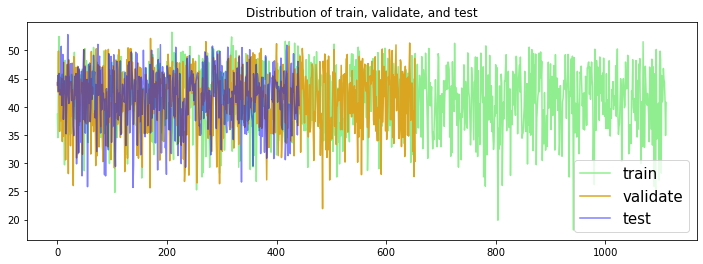

In [7]:
plt.figure(figsize=(12, 4))
plt.title('Distribution of train, validate, and test')
plt.plot(train.index, train.life_expectancy, color='lightgreen')
plt.plot(validate.index, validate.life_expectancy, color='goldenrod')
plt.plot(test.index, test.life_expectancy, color='blue', alpha=.5)
plt.legend(['train', 'validate', 'test'], fontsize=15)
plt.show()

<div class="alert alert-success">

# Explore

<div class="alert alert-warning">

# Visualization

Text(0.5, 1.0, 'Features Correlating with life_expectancy')

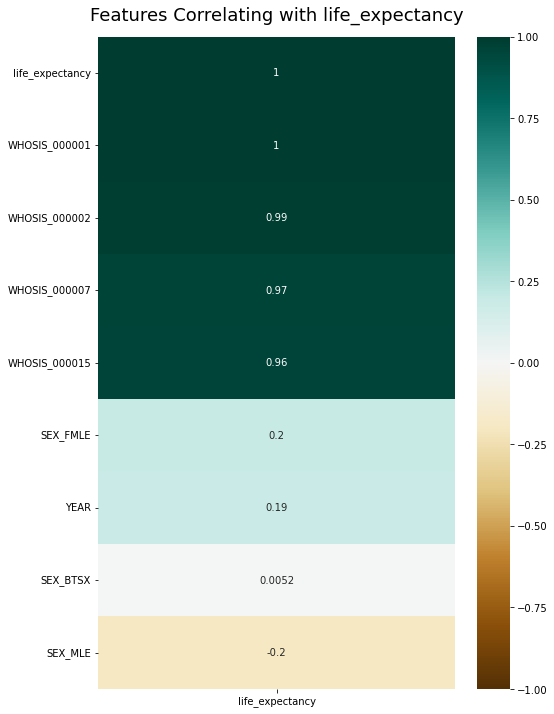

In [8]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr(method='spearman')[['life_expectancy']].sort_values(by='life_expectancy', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with life_expectancy', fontdict={'fontsize':18}, pad=16)

In [9]:
# create the correlation matrix using pandas .corr()
target_corr = train.corr(method='pearson')
target_corr

YEAR  WHOSIS_000001  WHOSIS_000002  WHOSIS_000007  \
YEAR             1.000000       0.223173       0.219490       0.189160   
WHOSIS_000001    0.223173       1.000000       0.993277       0.914271   
WHOSIS_000002    0.219490       0.993277       1.000000       0.896991   
WHOSIS_000007    0.189160       0.914271       0.896991       1.000000   
WHOSIS_000015    0.200444       0.909013       0.878684       0.990299   
life_expectancy  0.219159       0.994918       0.987897       0.949282   
SEX_BTSX         0.061422       0.004712       0.003896       0.012321   
SEX_FMLE        -0.048735       0.201415       0.129266       0.239584   
SEX_MLE         -0.014124      -0.203305      -0.131362      -0.248631   

                 WHOSIS_000015  life_expectancy  SEX_BTSX  SEX_FMLE   SEX_MLE  
YEAR                  0.200444         0.219159  0.061422 -0.048735 -0.014124  
WHOSIS_000001         0.909013         0.994918  0.004712  0.201415 -0.203305  
WHOSIS_000002         0.878684         0.987897  0.003896  0.129266 -0.131362  
WHOSIS_000007         0.990299         0.949282  0.012321  0.239584 -0.248631  
WHOSIS_000015         1.000000         0.941125  0.014028  0.290270 -0.300320  
life_expectancy       0.941125         1.000000  0.006840  0.198595 -0.202680  
SEX_BTSX              0.014028         0.006840  1.000000 -0.499143 -0.520046  
SEX_FMLE              0.290270         0.198595 -0.499143  1.000000 -0.480551  
SEX_MLE              -0.300320        -0.202680 -0.520046 -0.480551  1.000000

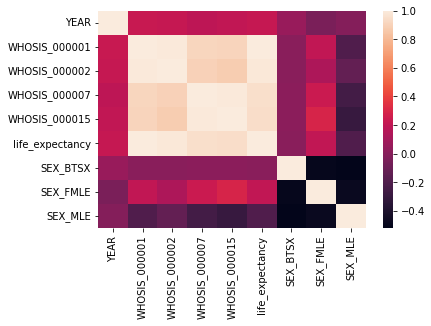

In [10]:
# pass my correlation matrix to Seaborn's heatmap
sns.heatmap(target_corr)
plt.show()

In [11]:
np.triu(target_corr)

array([[ 1.        ,  0.22317333,  0.21948972,  0.18915952,  0.20044433,
         0.21915873,  0.06142226, -0.04873542, -0.01412374],
       [ 0.        ,  1.        ,  0.99327665,  0.91427123,  0.90901343,
         0.994918  ,  0.00471178,  0.20141468, -0.20330536],
       [ 0.        ,  0.        ,  1.        ,  0.89699067,  0.87868444,
         0.98789669,  0.00389641,  0.12926573, -0.1313621 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.99029921,
         0.94928157,  0.01232115,  0.2395844 , -0.2486308 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.94112527,  0.01402816,  0.29027047, -0.30032024],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.00684026,  0.19859463, -0.20267975],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        , -0.49914294, -0.52004575],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0

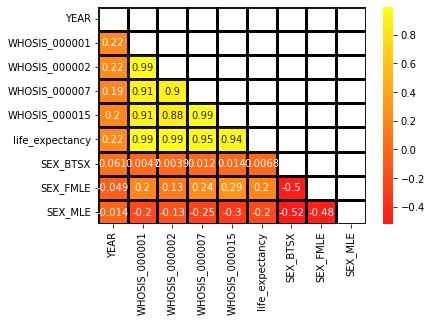

In [12]:
# pass my correlation matrix to Seaborn's heatmap with more customization! 
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black'}

sns.heatmap(target_corr, cmap='autumn', annot=True, 
            mask=np.triu(target_corr), **kwargs)
plt.show()

In [13]:
train.corr()

YEAR  WHOSIS_000001  WHOSIS_000002  WHOSIS_000007  \
YEAR             1.000000       0.223173       0.219490       0.189160   
WHOSIS_000001    0.223173       1.000000       0.993277       0.914271   
WHOSIS_000002    0.219490       0.993277       1.000000       0.896991   
WHOSIS_000007    0.189160       0.914271       0.896991       1.000000   
WHOSIS_000015    0.200444       0.909013       0.878684       0.990299   
life_expectancy  0.219159       0.994918       0.987897       0.949282   
SEX_BTSX         0.061422       0.004712       0.003896       0.012321   
SEX_FMLE        -0.048735       0.201415       0.129266       0.239584   
SEX_MLE         -0.014124      -0.203305      -0.131362      -0.248631   

                 WHOSIS_000015  life_expectancy  SEX_BTSX  SEX_FMLE   SEX_MLE  
YEAR                  0.200444         0.219159  0.061422 -0.048735 -0.014124  
WHOSIS_000001         0.909013         0.994918  0.004712  0.201415 -0.203305  
WHOSIS_000002         0.878684         0.987897  0.003896  0.129266 -0.131362  
WHOSIS_000007         0.990299         0.949282  0.012321  0.239584 -0.248631  
WHOSIS_000015         1.000000         0.941125  0.014028  0.290270 -0.300320  
life_expectancy       0.941125         1.000000  0.006840  0.198595 -0.202680  
SEX_BTSX              0.014028         0.006840  1.000000 -0.499143 -0.520046  
SEX_FMLE              0.290270         0.198595 -0.499143  1.000000 -0.480551  
SEX_MLE              -0.300320        -0.202680 -0.520046 -0.480551  1.000000

<AxesSubplot:>

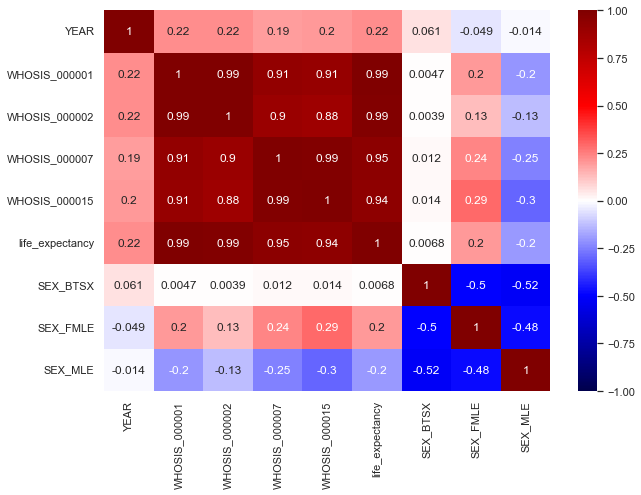

In [14]:
# Visualizing correlation with Seaborn
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(train.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

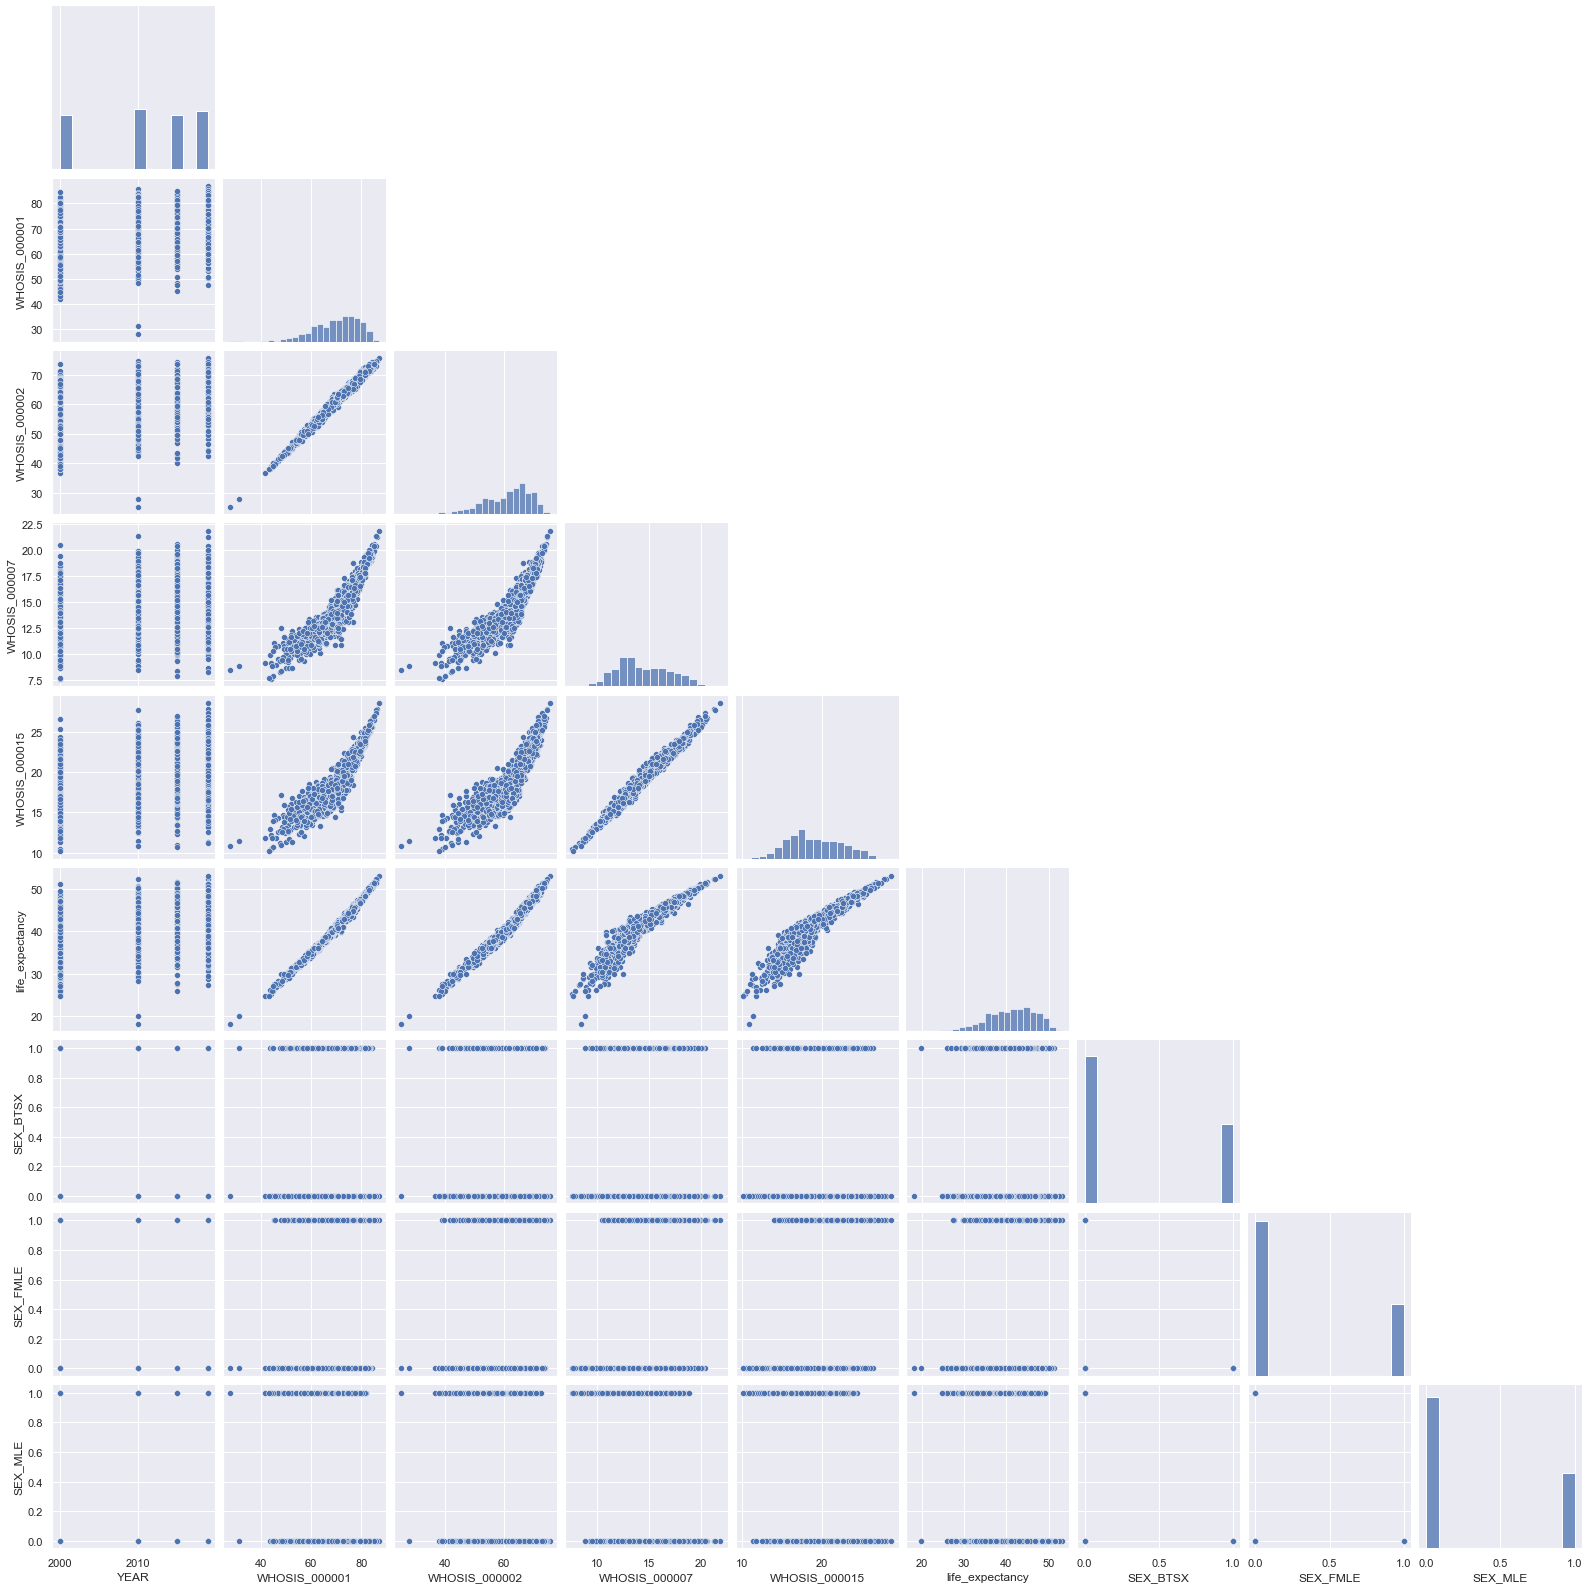

In [15]:
# We can drop the redundant information in the upper right half of the chart if we like.
sns.pairplot(data=train,
            corner=True)
plt.show()

In [16]:
#sns.histplot(train['life_expectancy'].dropna, kde=True, color='orange')

In [17]:
import plotly.express as px

fig = px.scatter(train, x='WHOSIS_000015', y='life_expectancy',
                 size='life_expectancy', color='YEAR',
                 hover_name='COUNTRY', log_x=True, size_max=40)
fig.show()

<AxesSubplot:>

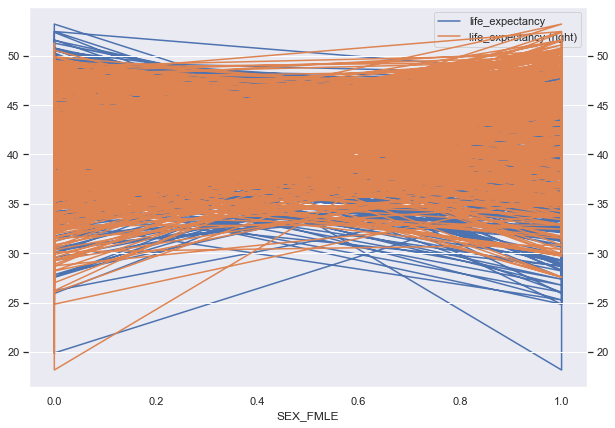

In [18]:
fig, ax = plt.subplots() # Create the figure and axes object

#### Plot the first x and y axes:
train.plot(x = 'SEX_MLE', y = 'life_expectancy', ax = ax) 
#### Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
#### (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html for details)
train.plot(x = 'SEX_FMLE', y = 'life_expectancy', ax = ax, secondary_y = True) 

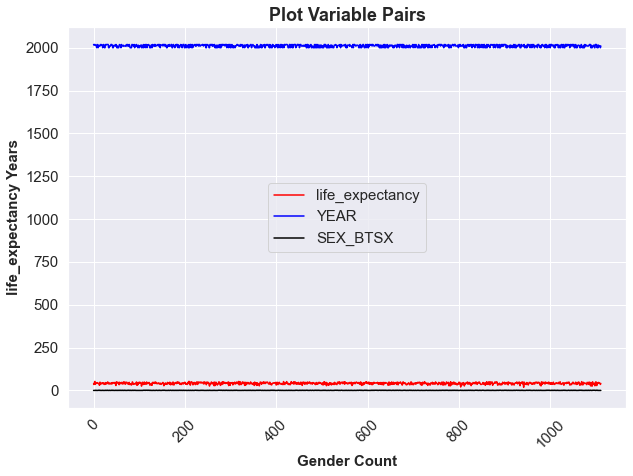

In [19]:
train['life_expectancy'].plot(kind='line', color='red', label='life_expectancy')
train['YEAR'].plot(kind='line', color='blue', label='YEAR')
train['SEX_BTSX'].plot(kind='line', color='black', label='SEX_BTSX')

plt.title('Plot Variable Pairs', fontsize=18, weight='bold')

plt.xlabel('Gender Count', fontsize=15, weight='bold')
plt.xticks(fontsize=15, rotation=45)

plt.ylabel('life_expectancy Years', fontsize=15, weight='bold')
plt.yticks(fontsize=15)

plt.legend(loc='center', fontsize=15)
plt.show()

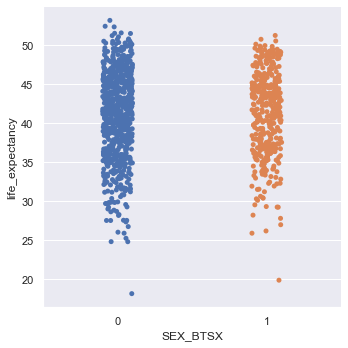

In [20]:
sns.catplot(data=train, y='life_expectancy', x='SEX_BTSX')

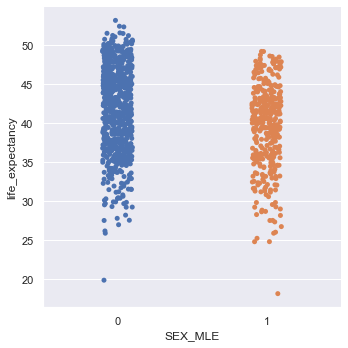

In [21]:
sns.catplot(data=train, y='life_expectancy', x='SEX_MLE')

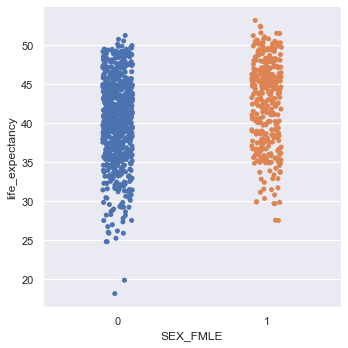

In [22]:
sns.catplot(data=train, y='life_expectancy', x='SEX_FMLE')

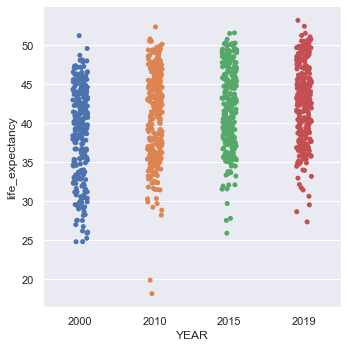

In [23]:
sns.catplot(data=train, y='life_expectancy', x='YEAR')

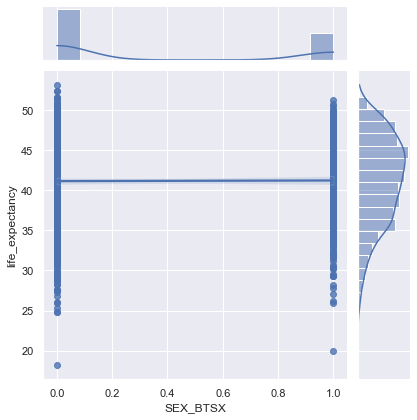

In [24]:
sns.jointplot(data=train, x=train.SEX_BTSX, y=train.life_expectancy, kind='reg')

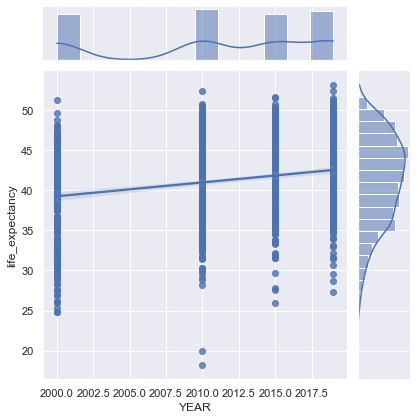

In [25]:
sns.jointplot(data=train, x=train.YEAR, y=train.life_expectancy, kind='reg')

In [26]:
def plot_variable_pairs(df, target):
    """
    Takes in a dataframe and target variable and plots each feature with the target variable
    """

    cols = df.columns.to_list()
    cols.remove(target) 
    for col in cols:
        sns.lmplot(x=col, y=target, data=df, line_kws={'color': 'red'})
    
    return plt.show()

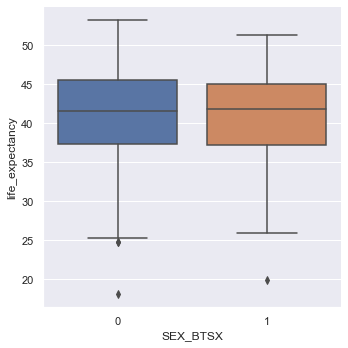

In [27]:
sns.catplot(data=train, x="SEX_BTSX", y="life_expectancy", kind="box")

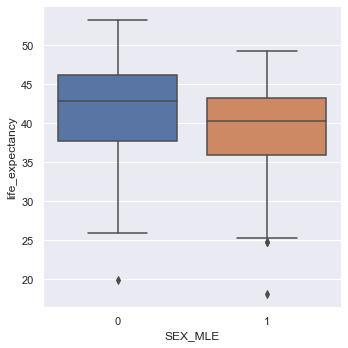

In [28]:
sns.catplot(data=train, x="SEX_MLE", y="life_expectancy", kind="box")

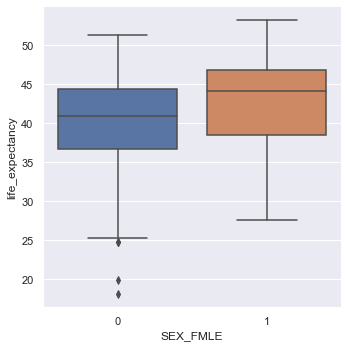

In [29]:
sns.catplot(data=train, x="SEX_FMLE", y="life_expectancy", kind="box")

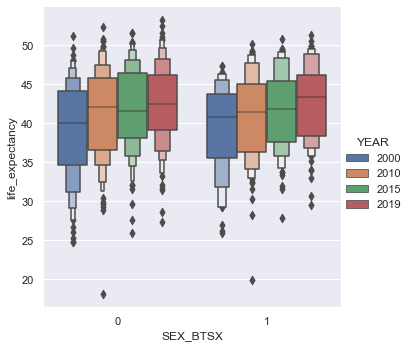

In [30]:
sns.catplot(data=train, x="SEX_BTSX", y="life_expectancy", hue="YEAR", kind="boxen")

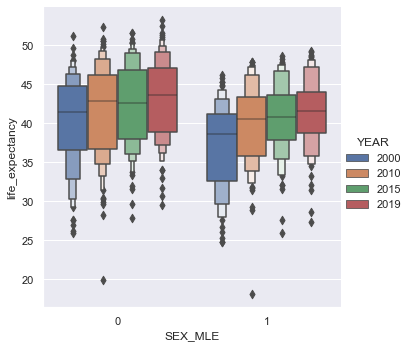

In [31]:
sns.catplot(data=train, x="SEX_MLE", y="life_expectancy", hue="YEAR", kind="boxen")

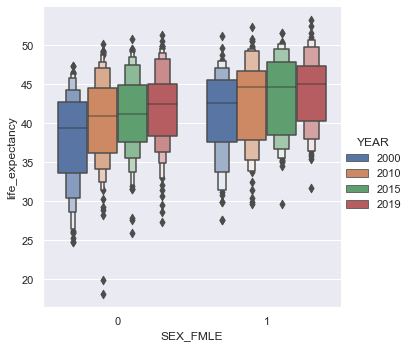

In [32]:
sns.catplot(data=train, x="SEX_FMLE", y="life_expectancy", hue="YEAR", kind="boxen")

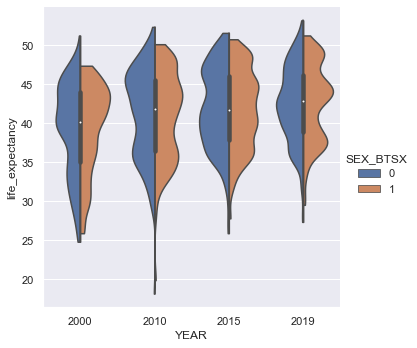

In [33]:
sns.catplot(
    data=train, x="YEAR", y="life_expectancy", hue="SEX_BTSX",
    kind="violin", bw=.25, cut=0, split=True)

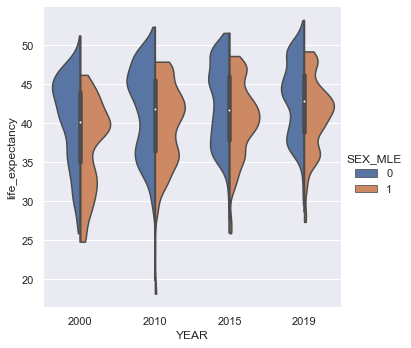

In [34]:
sns.catplot(
    data=train, x="YEAR", y="life_expectancy", hue="SEX_MLE",
    kind="violin", bw=.25, cut=0, split=True)

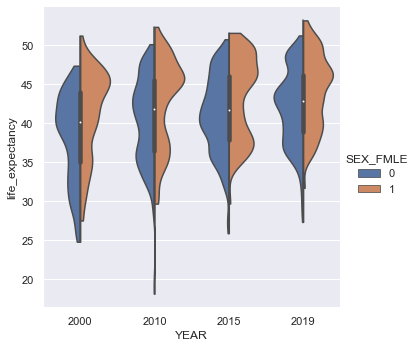

In [35]:
sns.catplot(
    data=train, x="YEAR", y="life_expectancy", hue="SEX_FMLE",
    kind="violin", bw=.25, cut=0, split=True)

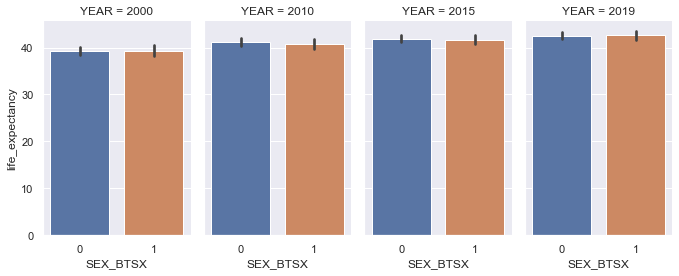

In [36]:
sns.catplot(
    data=train, x="SEX_BTSX", y="life_expectancy", col="YEAR",
    kind="bar", height=4, aspect=.6,
)

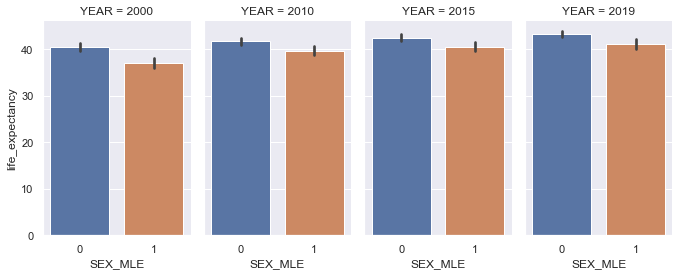

In [37]:
sns.catplot(
    data=train, x="SEX_MLE", y="life_expectancy", col="YEAR",
    kind="bar", height=4, aspect=.6,
)

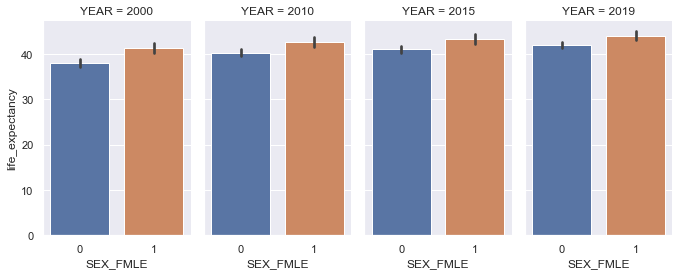

In [38]:
sns.catplot(
    data=train, x="SEX_FMLE", y="life_expectancy", col="YEAR",
    kind="bar", height=4, aspect=.6,
)

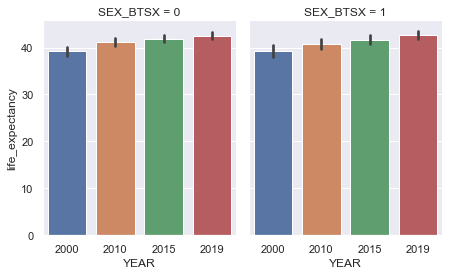

In [39]:
sns.catplot(
    data=train, x="YEAR", y="life_expectancy", col="SEX_BTSX",
    kind="bar", height=4, aspect=.8,
)

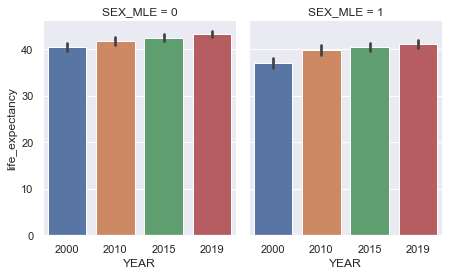

In [40]:
sns.catplot(
    data=train, x="YEAR", y="life_expectancy", col="SEX_MLE",
    kind="bar", height=4, aspect=.8,
)

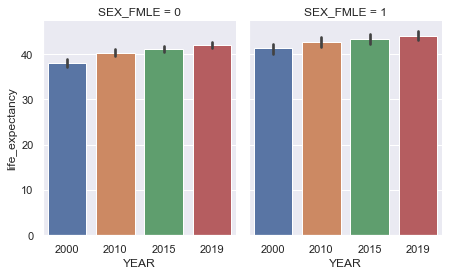

In [41]:
sns.catplot(
    data=train, x="YEAR", y="life_expectancy", col="SEX_FMLE",
    kind="bar", height=4, aspect=.8,
)

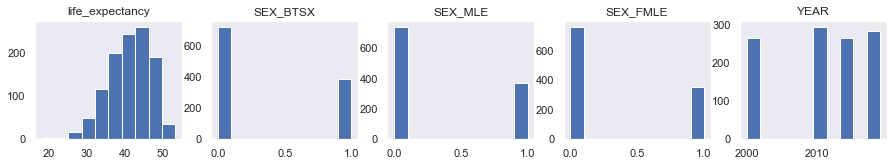

In [42]:
plt.figure(figsize=(50, 10))

# List of columns
cols = ['life_expectancy', 'SEX_BTSX', 'SEX_MLE', 'SEX_FMLE', 'YEAR']
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(4,16,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    train[col].hist(bins=10)
    # Hide gridlines.
    plt.grid(False)

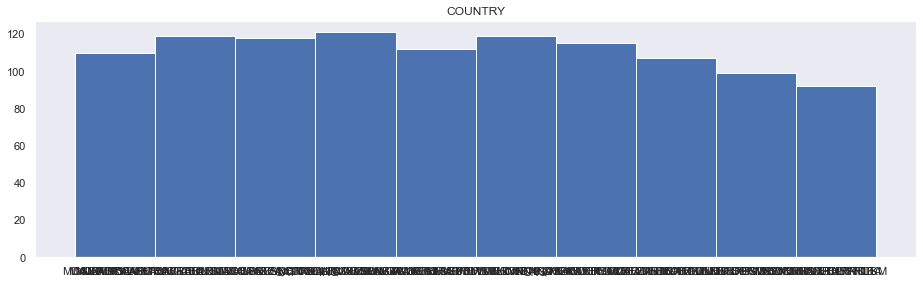

In [43]:
plt.figure(figsize=(300, 20))

# List of columns
cols = ['COUNTRY']
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(4,16,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    train[col].hist(bins=10)
    # Hide gridlines.
    plt.grid(False)

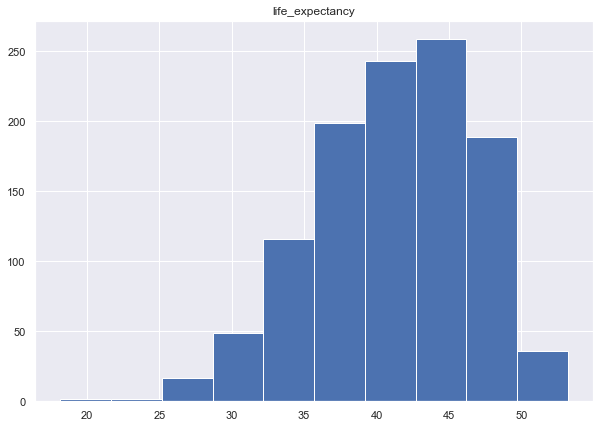

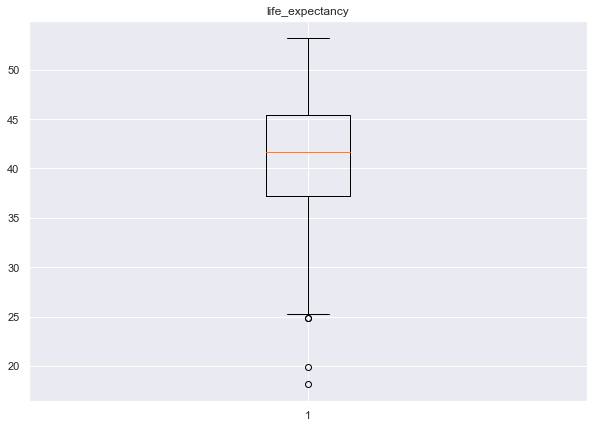

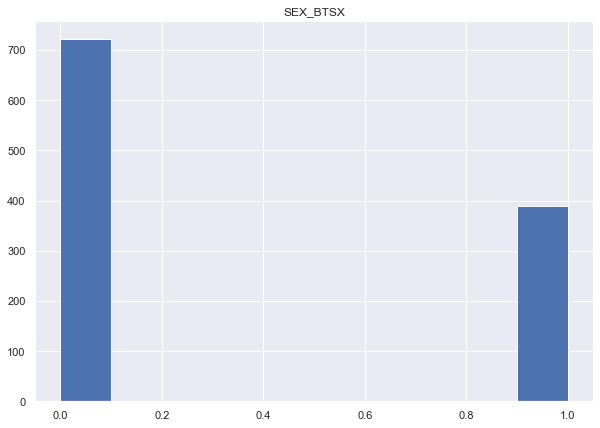

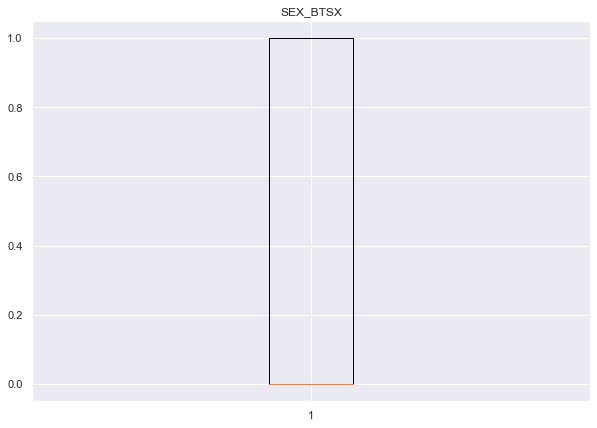

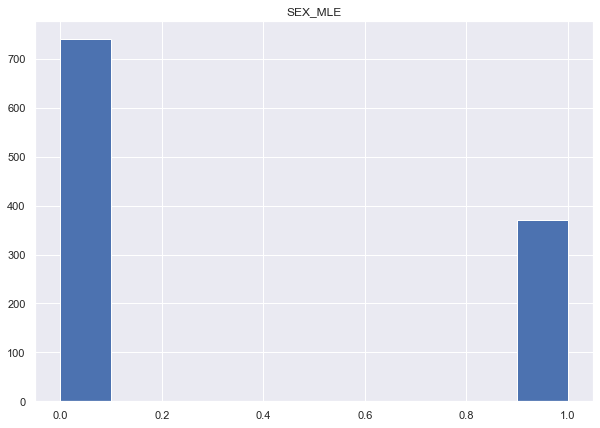

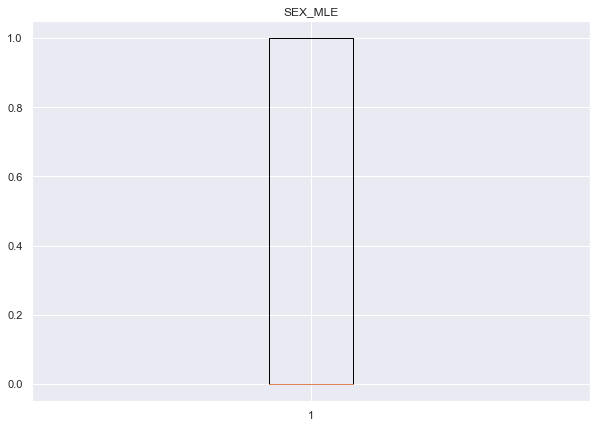

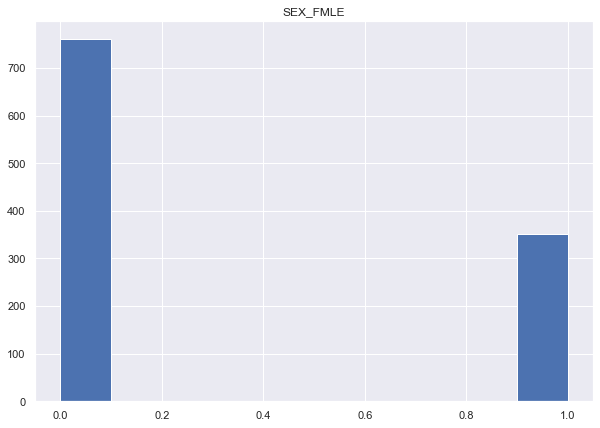

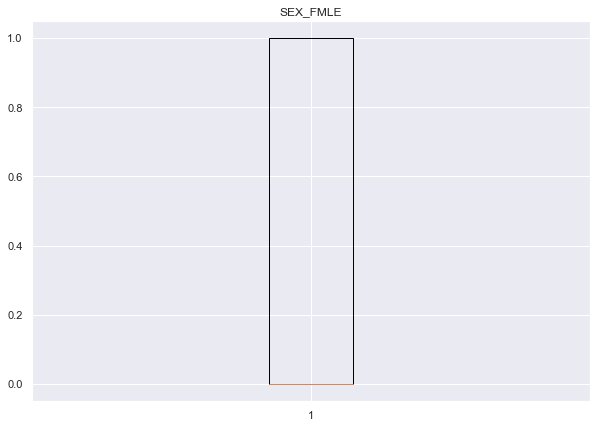

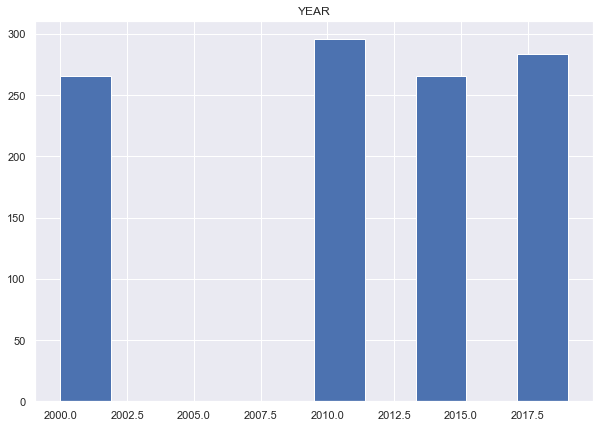

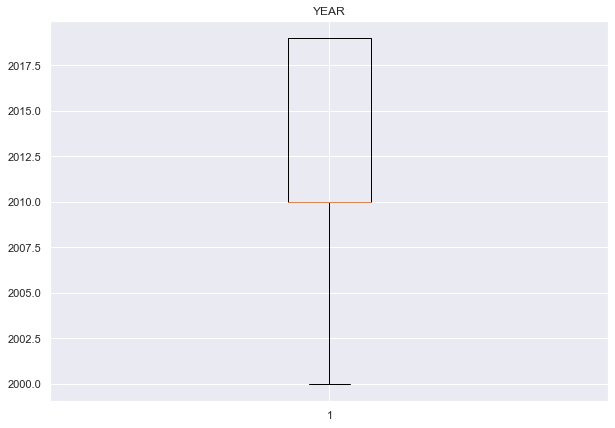

In [44]:
# List of columns
cols = ['life_expectancy', 'SEX_BTSX', 'SEX_MLE', 'SEX_FMLE', 'YEAR']

# Plot numeric columns
for col in cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()

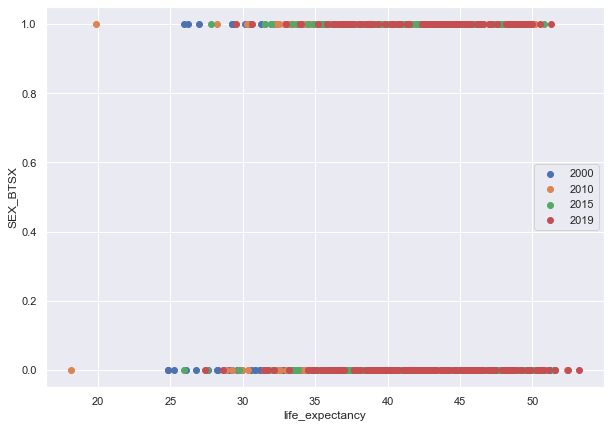

In [45]:
categorical_target = 'YEAR'
combos = [('life_expectancy','SEX_BTSX','SEX_MLE','SEX_FMLE','YEAR')]

x = combos[0][0]
y = combos[0][1]

def scatter_chart(x, y):
    for life_expectancy, subset in train.groupby(categorical_target):
        plt.scatter(subset[x], subset[y], label = life_expectancy)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()
        
scatter_chart(x, y)

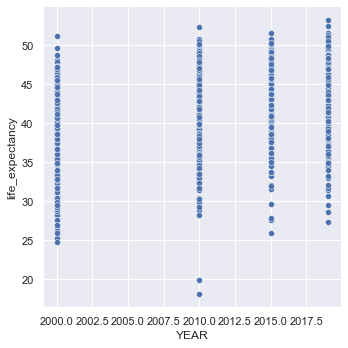

In [46]:
sns.relplot(data=train, x='YEAR', y='life_expectancy')
plt.show()

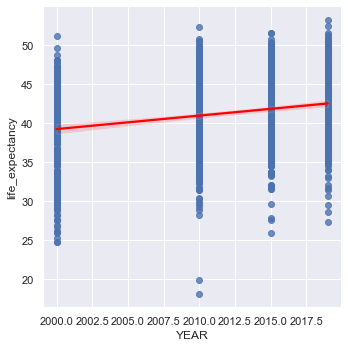

In [47]:
# I can really pop that line color if I want
sns.lmplot(data=train, x='YEAR', y='life_expectancy',
           line_kws={'color':'red'})
plt.show()

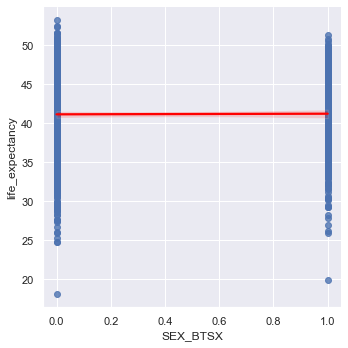

In [48]:
# I can really pop that line color if I want
sns.lmplot(data=train, x='SEX_BTSX', y='life_expectancy',
           line_kws={'color':'red'})
plt.show()

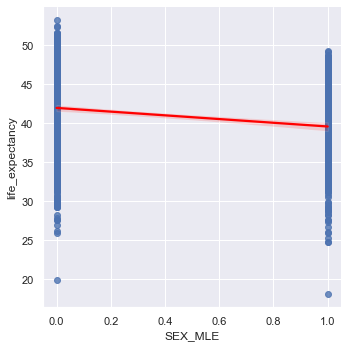

In [49]:
# I can really pop that line color if I want
sns.lmplot(data=train, x='SEX_MLE', y='life_expectancy',
           line_kws={'color':'red'})
plt.show()

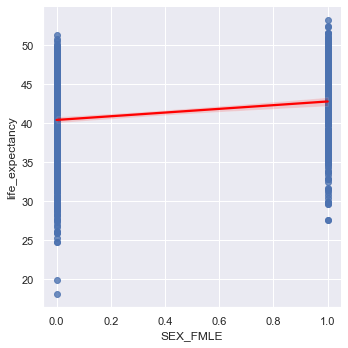

In [50]:
# I can really pop that line color if I want
sns.lmplot(data=train, x='SEX_FMLE', y='life_expectancy',
           line_kws={'color':'red'})
plt.show()

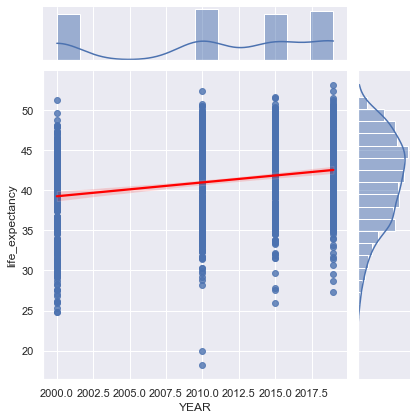

In [51]:
sns.jointplot(data=train, x='YEAR', y='life_expectancy',
             kind='reg', line_kws={'color':'red'})
plt.show()

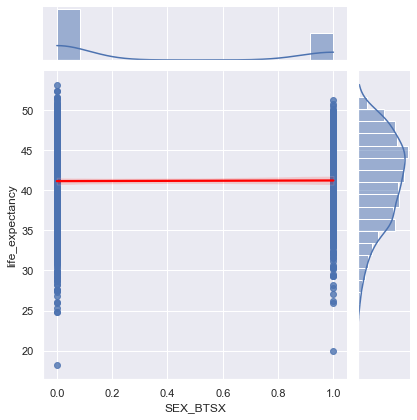

In [52]:
sns.jointplot(data=train, x='SEX_BTSX', y='life_expectancy',
             kind='reg', line_kws={'color':'red'})
plt.show()

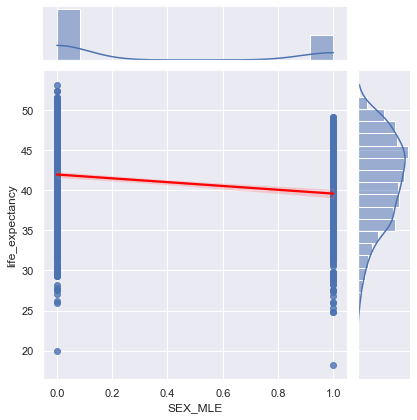

In [53]:
sns.jointplot(data=train, x='SEX_MLE', y='life_expectancy',
             kind='reg', line_kws={'color':'red'})
plt.show()

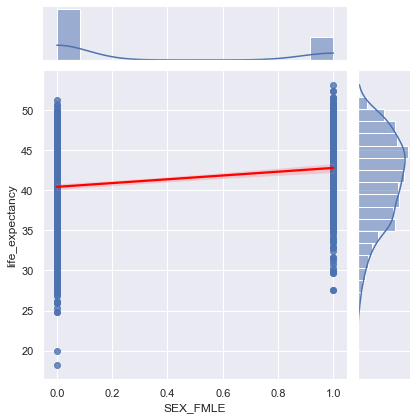

In [54]:
sns.jointplot(data=train, x='SEX_FMLE', y='life_expectancy',
             kind='reg', line_kws={'color':'red'})
plt.show()

SEX_FMLE
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: SEX_MLE, dtype: object

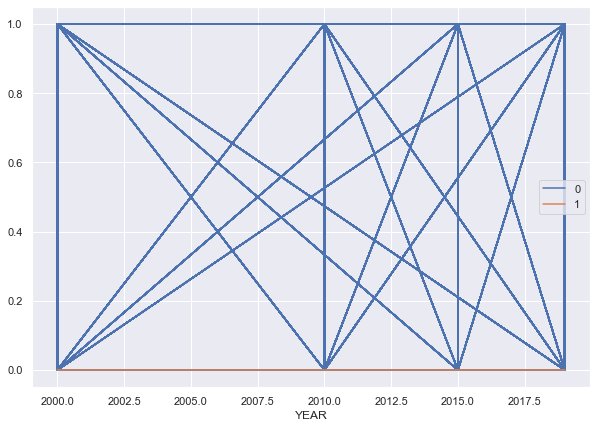

In [55]:
# 
df = train.copy()

#define index column
df.set_index('YEAR', inplace=True)

#group data by product and display sales as line chart
df.groupby('SEX_FMLE')['SEX_MLE'].plot(legend=True)


<AxesSubplot:xlabel='YEAR'>

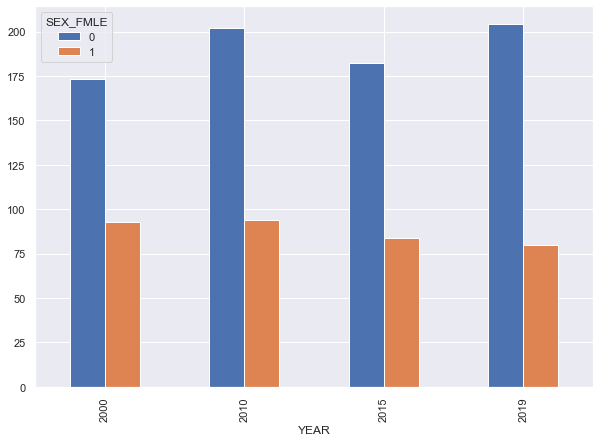

In [56]:
pd.crosstab(train['YEAR'],train['SEX_FMLE']).plot.bar()

<AxesSubplot:title={'center':'life_expectancy'}, xlabel='YEAR'>

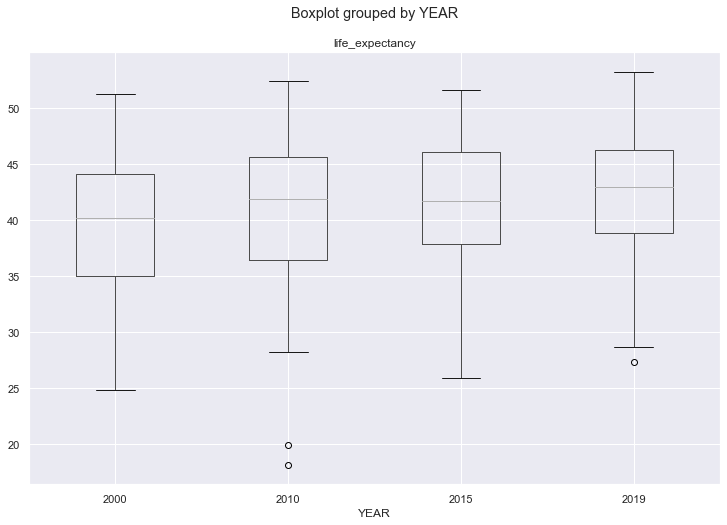

In [57]:
train.boxplot('life_expectancy', by='YEAR', figsize=(12, 8))

# Explore:
<div class="alert alert-info">

* **TARGET:** Life Expectancy

### Q1. Is there a relationship between Gender and Life Expectancy?
* **Statistical Test:** ```T-Test```
* **Results:** ```t-stat: -265.90025826286285, p-val: 0.0```
* **Answer:** There <b><u>is a ```significant relationship```</b></u> between Gender and Life Expectancy

### Q2. Is the Life Expectancy of Females greater than the Life Expectancy of Males?
* **Statistical Test:** ```T-Test```
* **Results:** ```t-stat: -266.1653368419764, p-val: 0.0```
* **Answer:** The life_expectancy of Females <b><u>is ```greater than```</b></u> the life_expectancy of Males

### Q3. Is there a relationship between the Year and Life Expectancy?
* **Statistical Test:** ```T-Test```
* **Results:** ```t-stat: 7989.336446207112, p-val: 0.0```
* **Answer:** There <b><u>is a ```significant relationship```</b></u> between the Year and Life Expectancy.

    
### Q4. Is there a relational difference between the four observable Years in our data?
* **Statistical Test:** ```ANOVA```
* **Results:** ```f_val: 53815696.49335445, p_val: 0.0```
* **Answer:** The average life_expectancy of each year <b><u>is ```significantly different```</b></u> than the other years.
</div>

<div class="alert alert-danger">



# Include at least 4 visualizations in the form of:
* Question in markdown that you want to answer
* Visualization
* Statistical test (in at least 2 of your 4)
* Provide your clear answer or takeaway in markdown and natural language to the question based on your exploration.

<div class="alert alert-warning">


# Q1
## Is there a relationship between Gender and life_expectancy?

## Hypothesis

**A. Set Hypothesis**  
  
 * One Tail (```<= | >```) or Two Tails (```== | !=```)?  
  **two_tail (BTSX, life_expectancy)**  
  
  
 * One Sample or Two Samples?  
  **two_sample (BTSX, life_expectancy)**  
  
  
 * Continuous or Discreat?  
  **Discreate (BTSX) vs Continuous (life_expectancy) = T-Test**.  
      * T-Test = ```Discreat``` vs ```Continuous```  
      * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
      * $Chi^2$ = ```Discreat``` vs ```Discreat```  
  
  
 * $𝐻_0$: The opposite of what I am trying to prove  
  **$H_{0}$: There is **NOT** a significant ```relationship``` between Gender and Life Expectancy**.   
      * ```BTSX``` != ```life_expectancy```  
  
  
 * $𝐻_𝑎$: What am I trying to prove  
  **$H_{a}$: There **is** a significant ```relationship``` between Gender and Life Expectancy**.  
      * ```BTSX``` == ```life_expectancy```

## Visualization

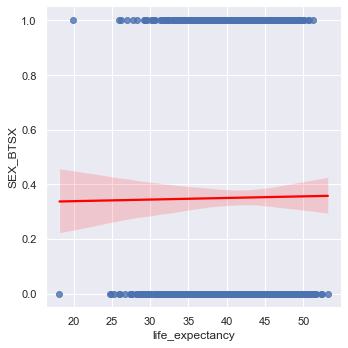

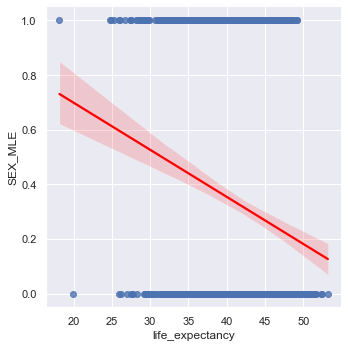

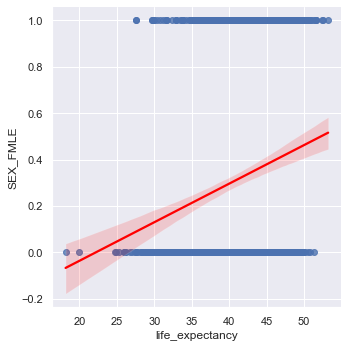

In [58]:
sns.lmplot(y='SEX_BTSX', x='life_expectancy', data=train, line_kws={'color': 'red'})
sns.lmplot(y='SEX_MLE', x='life_expectancy', data=train, line_kws={'color': 'red'})
sns.lmplot(y='SEX_FMLE', x='life_expectancy', data=train, line_kws={'color': 'red'})

## Test Hypothesis

<div class="alert alert-warning">

# T-Test
**Compute test statistic and probability (t-statistic & p-value)**

In [59]:
t_stat, p_val = stats.levene(train.SEX_BTSX, train.life_expectancy)

# Set Alpha α
α = Alpha = alpha = 0.05

if p_val < α:
    print('equal_var = False (we cannot assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train.SEX_BTSX, 
                                    train.life_expectancy, 
                                    equal_var = False)
    print('_______________________________________________________________')  
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

else:
    print('equal_var = True (we will assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train.SEX_BTSX, 
                                    train.life_expectancy, 
                                    equal_var = True)
    print('_______________________________________________________________')  
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

equal_var = False (we cannot assume equal variance)
_______________________________________________________________
t-stat: -244.59654594013125
p-value: 0.0


In [60]:
# """Comment out appropriate tail to run proper formula"""

# one_tail
"""
if (t > 0) and ((p / 2) < α):
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')
"""
    
# two_tail
if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


<div class="alert alert-info">
    
# Q1
    
### YES
### There **is** a significant ```relationship``` between Gender and Life Expectancy
    
    
### **There is evidence to support that Gender has a significant impact on average Life Expectancy.**  
    
* Based on this statistical finding I believe that Gender will be a determining feature in any machine learning efforts going forward.

<div class="alert alert-warning">


# Q2 
## Is the Life Expectancy of Females greater than the Life Expectancy of Males?

## Hypothesis

 * One Tail (```<= | >```) or Two Tails (```== | !=```)?  
  **one_tail 
  
  
 * One Sample or Two Samples?  
  **two_sample 
  
  
 * Continuous or Discreat?  
  **Continuous (Female) vs Continuous (Life Expectancy) = Pearson-R**.  
      * T-Test = ```Discreat``` vs ```Continuous```  
      * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
      * $Chi^2$ = ```Discreat``` vs ```Discreat```  
  
  
 * $𝐻_0$: The opposite of what I am trying to prove  
  **$H_{0}$: The life_expectancy of Females ```is less than``` the life_expectancy of Males**. 
      * ```SEX_FMLE``` <= ```life_expectancy```  
  
 * $𝐻_𝑎$: What am I trying to prove  
  **$H_{a}$: The life_expectancy of Females ```is greater than``` the life_expectancy of Males**. 
      * ```SEX_FMLE``` > ```life_expectancy```

In [61]:
# Create groupby variables
is_male = train.SEX_MLE == 1
is_female = train.SEX_FMLE == 1
is_BTSX = train.SEX_BTSX == 1

## Visualization

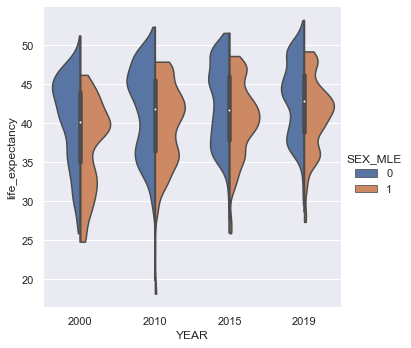

In [62]:
sns.catplot(
    data=train, x="YEAR", y="life_expectancy", hue="SEX_MLE",
    kind="violin", bw=.25, cut=0, split=True)

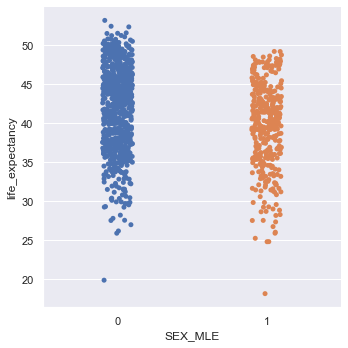

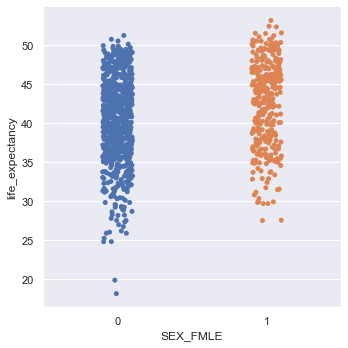

In [63]:
sns.catplot(data=train, y='life_expectancy', x='SEX_MLE')
sns.catplot(data=train, y='life_expectancy', x='SEX_FMLE')

**Verify Assumptions**
* How big is sample size?
* If sample size is significantly > 30, we don't have to worry about normality (CLT!!)

In [64]:
# how many observations do I have for each sample? (N>30,we we meet normality condition)

print(train.groupby(is_female).life_expectancy.count()) 
print('___________________________________________________')
print(train.groupby(is_male).life_expectancy.count())
print('___________________________________________________')
print(f'Total Count: {train.life_expectancy.count()}')

SEX_FMLE
False    761
True     351
Name: life_expectancy, dtype: int64
___________________________________________________
SEX_MLE
False    741
True     371
Name: life_expectancy, dtype: int64
___________________________________________________
Total Count: 1112


In [65]:
print(train.groupby(is_female).life_expectancy.mean())
print('___________________________________________________')
print(train.groupby(is_male).life_expectancy.mean())
print('___________________________________________________')
print(train.groupby(is_BTSX).life_expectancy.mean())

SEX_FMLE
False    40.439310
True     42.808379
Name: life_expectancy, dtype: float64
___________________________________________________
SEX_MLE
False    41.982233
True     39.598978
Name: life_expectancy, dtype: float64
___________________________________________________
SEX_BTSX
False    41.159227
True     41.238702
Name: life_expectancy, dtype: float64


## Test Hypothesis

<div class="alert alert-warning">

# T-Test
**Compute test statistic and probability (t-statistic & p-value)**

In [87]:
t_stat, p_val = stats.levene(train.SEX_FMLE, 
                             train.life_expectancy
                            )

# Set Alpha α
α = Alpha = alpha = 0.05

if p_val < α:
    print('equal_var = False (we cannot assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train.SEX_FMLE,
                                    train.life_expectancy, 
                                    equal_var = False)
    print('_______________________________________________________________')  
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

else:
    print('equal_var = True (we will assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train.SEX_FMLE,
                                    train.life_expectancy, 
                                    equal_var = True)
    print('_______________________________________________________________')  
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

equal_var = False (we cannot assume equal variance)
_______________________________________________________________
t-stat: -244.85287876004145
p-value: 0.0


In [88]:
# """Comment out appropriate tail to run proper formula"""

# one_tail

if (t_stat > 0) and ((p_val / 2) < α):
    print('We can reject the null hypothesis')
    
else:
    print('we fail to reject the null hypothesis')

    
"""
    
# two_tail
if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')
"""

we fail to reject the null hypothesis


"\n    \n# two_tail\nif p_val < α:\n    print('Reject the null hypothesis')\nelse:\n    print('Fail to reject the null hypothesis')\n"

<div class="alert alert-info">
    
# Q2
    
## YES
The life_expectancy of Females **is** ```greater than``` the life_expectancy of Males
    

### **There is evidence to support that Female have a greater Life Expectancy than Males.**  
    
* Based on this statistical finding I believe that the Female Gender feature should be used in any machine learning efforts going forward.    

<div class="alert alert-warning">

# T-Test
**Compute test statistic and probability (t-statistic & p-value)**

In [68]:
t_stat, p_val = stats.levene(train.SEX_MLE, 
                             train.life_expectancy
                            )

# Set Alpha α
α = Alpha = alpha = 0.05

if p_val < α:
    print('equal_var = False (we cannot assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train.SEX_MLE,
                                    train.life_expectancy, 
                                    equal_var = False)
    print('_______________________________________________________________')  
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

else:
    print('equal_var = True (we will assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train.SEX_MLE,
                                    train.life_expectancy, 
                                    equal_var = True)
    print('_______________________________________________________________')  
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

equal_var = False (we cannot assume equal variance)
_______________________________________________________________
t-stat: -244.72019837462415
p-value: 0.0


In [69]:
# """Comment out appropriate tail to run proper formula"""

# one_tail
"""
if (t > 0) and ((p / 2) < α):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')
"""
    
# two_tail
if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


<div class="alert alert-danger">
    
### Q2    
The life_expectancy of Males **is** ```greater than``` the life_expectancy of Males
    
# How can the oposite of the 1st test be True?
* What am I doing wrong?

<div class="alert alert-warning">


# Q3
## Is there a relationship between ```Year``` and ```life_expectancy```?

## Hypothesis

**A. Set Hypothesis**  
  
 * One Tail (```<= | >```) or Two Tails (```== | !=```)?  
  **two_tail  
  
  
 * One Sample or Two Samples?  
  **two_sample  
  
  
 * Continuous or Discreat?  
  **Discreate (YEAR) vs Continuous (life_expectancy) = T-Test**.  
      * T-Test = ```Discreat``` vs ```Continuous```  
      * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
      * $Chi^2$ = ```Discreat``` vs ```Discreat```  
  
  
 * $𝐻_0$: The opposite of what I am trying to prove  
  **$H_{0}$: There is **NOT** a significant ```relationship``` between the Year and Life Expectancy**.   
      * ```YEAR``` != ```life_expectancy```  
  
  
 * $𝐻_𝑎$: What am I trying to prove  
  **$H_{a}$: There **is** a significant ```relationship``` between the Year and Life Expectancy**.  
      * ```YEAR``` == ```life_expectancy```

## Visualization

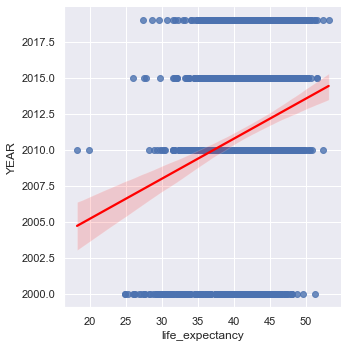

In [70]:
sns.lmplot(y='YEAR', x='life_expectancy', data=train, line_kws={'color': 'red'})
plt.show()

## Test Hypothesis

<div class="alert alert-warning">



# T-Test
**Compute test statistic and probability (t-statistic & p-value)**

In [71]:
t_stat, p_val = stats.levene(train.YEAR, train.life_expectancy)

# Set Alpha α
α = Alpha = alpha = 0.05

if p_val < α:
    print('equal_var = False (we cannot assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train.YEAR, 
                                    train.life_expectancy, 
                                    equal_var = False)
    print('_______________________________________________________________')  
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

else:
    print('equal_var = True (we will assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train.YEAR, 
                                    train.life_expectancy, 
                                    equal_var = True)
    print('_______________________________________________________________')  
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

equal_var = False (we cannot assume equal variance)
_______________________________________________________________
t-stat: 7335.918244735136
p-value: 0.0


In [72]:
# """Comment out appropriate tail to run proper formula"""

# one_tail
"""
if (t > 0) and ((p / 2) < α):
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')
"""
    
# two_tail
if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


<div class="alert alert-info">
    
# Q3

### YES
### There **is** a significant ```relationship``` between the Year and Life Expectancy.
    
    
### **There is evidence to support that the Year has a significant impact on average Life Expectancy.**  

* Based on this statistical finding I believe that Year will be a determining feature in any machine learning efforts going forward.

<div class="alert alert-warning">


# Q4 
## Is there a relational difference between the four observable Years in our data?

## Hypothesis

**A. Set Hypothesis**  
  
 * One Tail (```<= | >```) or Two Tails (```== | !=```)?  
  **two_tail 
  
  
 * One Sample or Two Samples?  
  **two_sample 
  
  
 * Continuous or Discreat?  
  **Discreat (YEAR) vs Continuous (Life Expectancy) = ANOVA**.  
      * T-Test = ```Discreat``` vs ```Continuous```  
      * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
      * $Chi^2$ = ```Discreat``` vs ```Discreat```  
  
  
 * $𝐻_0$: The opposite of what I am trying to prove  
  **$H_{0}$: The average life_expectancy of each year is **NOT** ```significantly different``` than the other years**. 
      * ```groupby(year).life_expectancy.mean``` != ```groupby(year).life_expectancy.mean```
  
  
 * $𝐻_𝑎$: What am I trying to prove  
  **$H_{a}$: The average life_expectancy of each year is ```significantly different``` than the other years**. 
      * ```groupby(year).life_expectancy.mean``` = ```groupby(year).life_expectancy.mean```

## Visualization

In [73]:
year_2000 = train.YEAR == 2000
year_2010 = train.YEAR == 2010
year_2015 = train.YEAR == 2015
year_2019 = train.YEAR == 2019
train.YEAR.value_counts()

2010    296
2019    284
2015    266
2000    266
Name: YEAR, dtype: int64

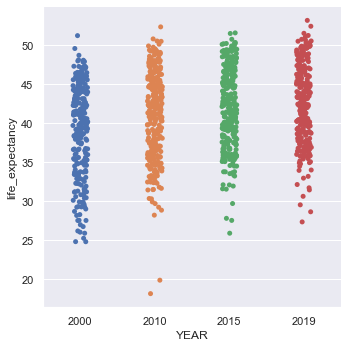

In [74]:
sns.catplot(data=train, y='life_expectancy', x='YEAR')

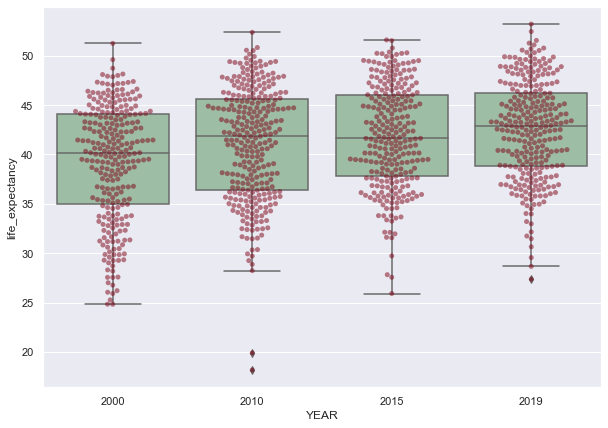

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='YEAR', y='life_expectancy', data=train, color='#99c2a2')
ax = sns.swarmplot(x="YEAR", y="life_expectancy", data=train, color='#7d0013', alpha=0.5)
plt.show()


**Verify Assumptions**
* How big is sample size?
* If sample size is significantly > 30, we don't have to worry about normality (CLT!!)

In [76]:
# how many observations do I have for each sample? (N>30,we we meet normality condition)

print(train.groupby(year_2000).life_expectancy.count()) 
print('___________________________________________________')
print(train.groupby(year_2010).life_expectancy.count())
print('___________________________________________________')
print(train.groupby(year_2015).life_expectancy.count())
print('___________________________________________________')
print(train.groupby(year_2019).life_expectancy.count())
print('___________________________________________________')
print(f'Total Count: {train.life_expectancy.count()}')

YEAR
False    846
True     266
Name: life_expectancy, dtype: int64
___________________________________________________
YEAR
False    816
True     296
Name: life_expectancy, dtype: int64
___________________________________________________
YEAR
False    846
True     266
Name: life_expectancy, dtype: int64
___________________________________________________
YEAR
False    828
True     284
Name: life_expectancy, dtype: int64
___________________________________________________
Total Count: 1112


## Test Hypothesis

In [77]:
# how many observations do I have for each sample? (N>30,we we meet normality condition)

print(train.groupby(year_2000).life_expectancy.mean()) 
print('___________________________________________________')
print(train.groupby(year_2010).life_expectancy.mean())
print('___________________________________________________')
print(train.groupby(year_2015).life_expectancy.mean())
print('___________________________________________________')
print(train.groupby(year_2019).life_expectancy.mean())
print('___________________________________________________')
print(f'Total Count: {train.life_expectancy.mean()}')

YEAR
False    41.800642
True     39.235759
Name: life_expectancy, dtype: float64
___________________________________________________
YEAR
False    41.228078
True     41.074134
Name: life_expectancy, dtype: float64
___________________________________________________
YEAR
False    40.989455
True     41.815702
Name: life_expectancy, dtype: float64
___________________________________________________
YEAR
False    40.721778
True     42.543743
Name: life_expectancy, dtype: float64
___________________________________________________
Total Count: 41.18710024055752


<div class="alert alert-warning">

# ANOVA $latex y_i = b_0+b_1X_{1,i} +…+b_{j-1,i} + e_i&s=2$
* ANOVA is a means of comparing the ratio of systematic variance to unsystematic variance in an experimental study. 
* Variance in the ANOVA is partitioned into total variance, variance due to groups, and variance due to individual differences.
* The ratio obtained when doing this comparison is known as the F-ratio. 
* A one-way ANOVA can be seen as a regression model with a single categorical predictor. This predictor usually has two plus categories. A one-way ANOVA has a single factor with J levels. Each level corresponds to the groups in the independent measures design.

    
* As for all parametric tests the data need to be normally distributed (each group’s data should be roughly normally distributed) for the F-statistic to be reliable. 
* Each experimental condition should have roughly the same variance (i.e., homogeneity of variance), the observations (e.g., each group) should be independent, and the dependent variable should be measured on, at least,  an interval scale.

#### Assumptions:
As with all parametric tests also ANOVA has a number of assumptions. 
1. First of all, the groups have to be independent of each other. 
2. Second, the data needs to be normally distributed (within each group). 
3. Third, there have to be equal variances between all groups. 

Homogeneity of variances can be tested with [Bartlett’s and Levene’s test](https://www.marsja.se/levenes-bartletts-test-of-equality-homogeneity-of-variance-in-python/) in Python (e.g., using SciPy) and the normality assumption can be tested using the Shapiro-Wilks test or by examining the distribution. Note, if your data is skewed you can transform it using e.g. the [log transformation](https://www.marsja.se/transform-skewed-data-using-square-root-log-box-cox-methods-in-python/) in Python.



In [78]:
import scipy.stats as stats

# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
f_val, p_val = stats.f_oneway(train['life_expectancy'], train['YEAR'])

print(f'f_val: {f_val}, p_val: {p_val}')

f_val: 53815696.49335445, p_val: 0.0


In [79]:
if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


<div class="alert alert-info">
    
# Q4
    
### YES
### The average Life Expectancy of each year **is** ```significantly different``` than the other years.
    
    
### **There is evidence to support that each Year is significantly different and will have an impact in determinng average Life Expectancy.**  
    
* Based on this statistical finding I believe that Year will be an integral feature and should be included in any machine learning efforts going forward.

<div class="alert alert-info">
    
# Exploration Summary